# Module 3 Final Project

* Student name: David Cuervo
* Student pace: Self Paced 
* Scheduled project review date/time: 7/21/2020 ; 3:00PM CST
* Instructor name: Jeff Herman
* Blog post URL: https://david-cuervo.github.io/northwind_dataset_analysis

## Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

In [65]:
# Connecting to the database

import pandas as pd
import sqlite3

In [160]:
conn = sqlite3.Connection('Northwind_small.sqlite')
cur = conn.cursor()

In [69]:
#Source data related to quantity and discount from OrderDetail dataset

cur.execute("""SELECT *
               FROM OrderDetail
               ;
               """)
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [6]:
#Determine all the discount types

df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [7]:
#Source data that removes outlier discounts

cur.execute("""SELECT *
               FROM OrderDetail
               WHERE Discount = 0.00 OR Discount = 0.05 OR Discount = 0.10 OR 
               Discount = 0.15 OR Discount = 0.20 OR Discount = 0.25
               """)
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.0
1,10248/42,10248,42,9.80,10,0.0
2,10248/72,10248,72,34.80,5,0.0
3,10249/14,10249,14,18.60,9,0.0
4,10249/51,10249,51,42.40,40,0.0
...,...,...,...,...,...,...
2142,11077/52,11077,52,7.00,2,0.0
2143,11077/55,11077,55,24.00,2,0.0
2144,11077/66,11077,66,17.00,1,0.0
2145,11077/75,11077,75,7.75,4,0.0


In [8]:
df['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

In [10]:
#Checking for quantity outliers

df['Quantity'].value_counts()

20     252
30     194
10     181
15     169
40     113
12      92
6       87
25      80
50      75
35      71
5       67
24      58
60      58
4       55
21      50
8       50
2       48
18      47
3       45
14      36
16      35
9       30
28      29
70      28
7       23
36      21
42      19
80      16
1       14
45      14
100     10
55       9
120      8
65       8
49       7
48       5
32       5
90       4
44       4
77       3
110      3
56       3
13       3
27       2
39       2
33       2
130      2
11       2
84       2
22       1
66       1
52       1
54       1
63       1
91       1
Name: Quantity, dtype: int64

[Text(0.5, 1.0, 'Discount Rates vs Quantity in Order')]

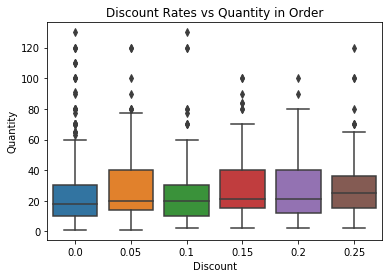

In [12]:
#Visualizing the relationship of discounts and quantities

sns.boxplot(x='Discount', y='Quantity', data=df).set(title='Discount Rates vs Quantity in Order')

### Ho: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 5% discount is zero.

### Ha: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 5% discount is not zero.

In [37]:
#Creating the control and experimental groups

no_discount = df[df.Discount == 0.0]

five_discount = df[df.Discount == 0.05]

In [45]:
import numpy as np
from scipy import stats

In [97]:
#Conduct two tailed t-test using the scipy function ttest_ind

stats.ttest_ind(five_discount['Quantity'], no_discount['Quantity'], equal_var = False)

Ttest_indResult(statistic=3.700844260760871, pvalue=0.00027233494432847593)

In [108]:
#Used Cohen' d as a measure of effect size

def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    d = diff / np.sqrt(pooled_var)
    
    return d

In [111]:
Cohen_d(five_discount['Quantity'], no_discount['Quantity'])

0.3468767736284544

### Ho: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 10% discount is zero.

### Ha: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 10% discount is not zero.

In [50]:
#Repeated for the remaining discount amounts 
ten_discount = df[df.Discount == 0.10]

In [103]:
stats.ttest_ind(ten_discount['Quantity'], no_discount['Quantity'], equal_var = False)

Ttest_indResult(statistic=2.094434281933477, pvalue=0.0374559661063408)

In [110]:
Cohen_d(ten_discount['Quantity'], no_discount['Quantity'])

0.19594203057834086

### Ho: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 15% discount is zero.

### Ha: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 15% discount is not zero.

In [52]:
fifteen_discount = df[df.Discount == 0.15]

In [104]:
stats.ttest_ind(fifteen_discount['Quantity'], no_discount['Quantity'], equal_var = False)

Ttest_indResult(statistic=3.8356620426605934, pvalue=0.00017220729443627393)

In [112]:
Cohen_d(fifteen_discount['Quantity'], no_discount['Quantity'])

0.3724041317472808

### Ho: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 20% discount is zero.

### Ha: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 20% discount is not zero.

In [55]:
twenty_discount = df[df.Discount == 0.20]

In [105]:
stats.ttest_ind(twenty_discount['Quantity'], no_discount['Quantity'], equal_var = False)

Ttest_indResult(statistic=3.4021239132172787, pvalue=0.0008110033254043408)

In [113]:
Cohen_d(twenty_discount['Quantity'], no_discount['Quantity'])

0.3007122542913553

### Ho: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 25% discount is zero.

### Ha: The difference in means between the quantity of product in an order with no discount and the quantity of product in an order with a 25% discount is not zero.

In [57]:
twentyfive_discount = df[df.Discount == 0.25]

In [106]:
stats.ttest_ind(twentyfive_discount['Quantity'], no_discount['Quantity'], equal_var = False)

Ttest_indResult(statistic=3.8572676240072523, pvalue=0.00015923050922125637)

In [114]:
Cohen_d(twentyfive_discount['Quantity'], no_discount['Quantity'])

0.36659255652674416

## Based on the results of the t-tests, the means of quantity ordered for every discount amount is significantly different than the mean of quantity ordered with no discount. However, the greatest effect size is seen with the 15% discount. We can conclude that applying a 15% discount to the products is the best discount to increase the quantity of product ordered.

# Q1. Does the unit price significantly affect the quantity of product ordered?

[Text(0.5, 1.0, 'Product Price')]

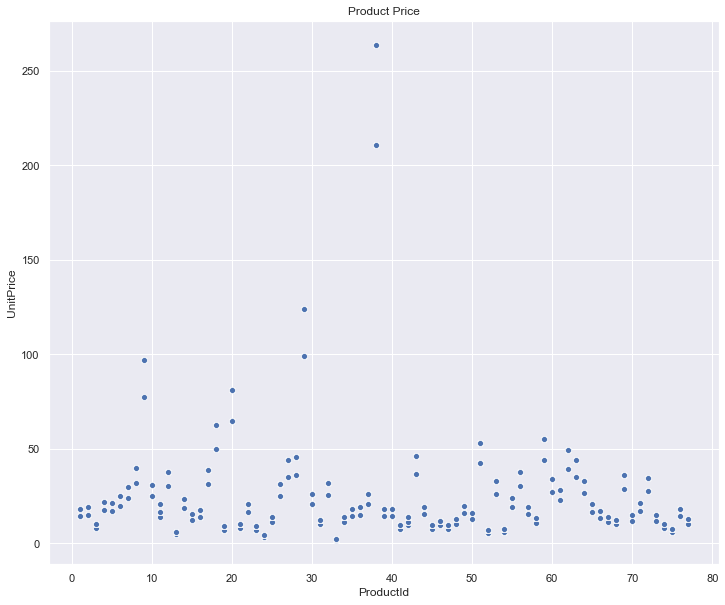

In [207]:
#Visualize the spread of product prices

sns.scatterplot(x='ProductId', y='UnitPrice', data=df).set(title='Product Price')

In [87]:
#Remove outliers by only keeping prices under $50

price = df[df.UnitPrice <= 50.00]

In [130]:
price.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


[Text(0.5, 1.0, 'Quantity vs Price')]

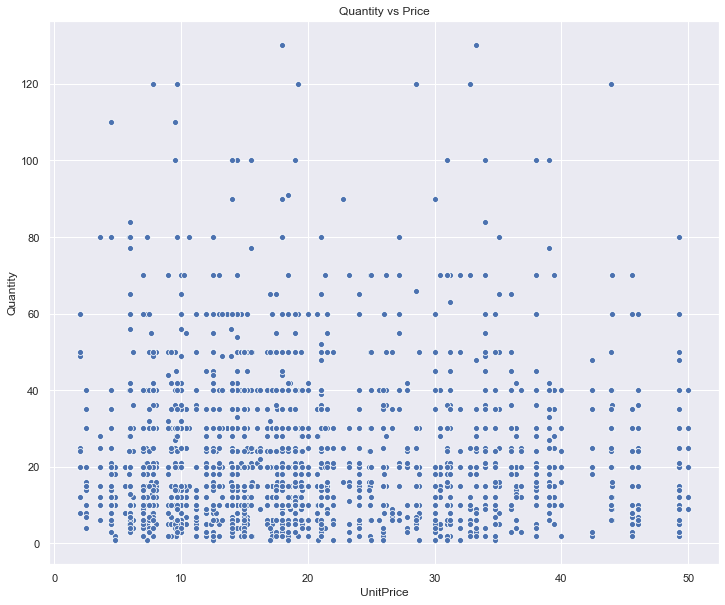

In [90]:
#Visualize the relationship between quantity ordered and product price

sns.scatterplot(x='UnitPrice', y='Quantity', data=price).set(title='Quantity vs Price')

In [127]:
#Create two groups of prices to compare means

highprice = price[price.UnitPrice >= 25.00]
lowprice = price[price.UnitPrice < 25.00]

In [170]:
price.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [175]:
#Create a new price column that is categorical to create a boxplot

price['lowhigh'] = ['High' if x >= 25.00 else 'Low' for x in price['UnitPrice']]

/Users/davidcuervo/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [177]:
price.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,lowhigh
0,10248/11,10248,11,14.0,12,0.0,Low
1,10248/42,10248,42,9.8,10,0.0,Low
2,10248/72,10248,72,34.8,5,0.0,High
3,10249/14,10249,14,18.6,9,0.0,Low
4,10249/51,10249,51,42.4,40,0.0,High


[Text(0.5, 1.0, 'Prices vs Quantity in Order')]

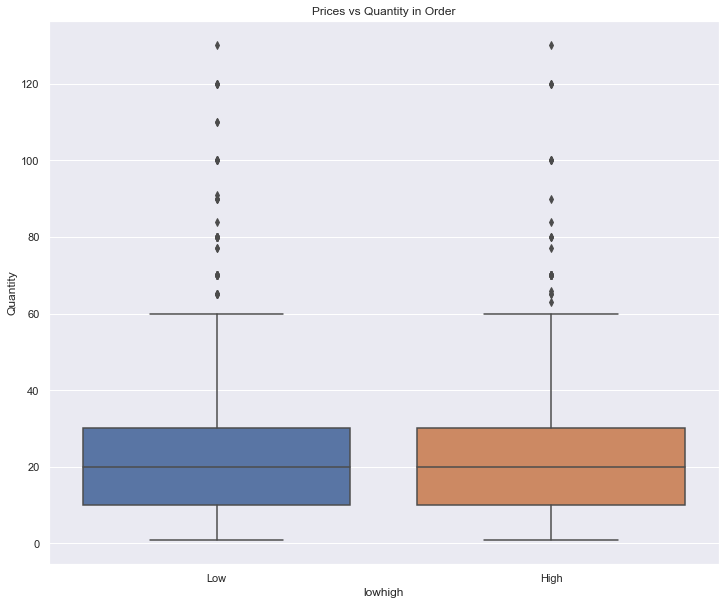

In [179]:
#Visualize the difference in quantity means between the two price groups

sns.boxplot(x='lowhigh', y='Quantity', data=price).set(title='Prices vs Quantity in Order')

### Ho: The difference in means between the quantity of product with a price below 25 dollars and the quantity of product with a price above 25 dollars is zero.

### Ha: The difference in means between the quantity of product with a price below 25 dollars and the quantity of product with a price above 25 dollars is not zero.

In [107]:
stats.ttest_ind(lowprice['Quantity'], highprice['Quantity'], equal_var = False)

Ttest_indResult(statistic=-0.8757605826189973, pvalue=0.3813537001247296)

In [115]:
Cohen_d(lowprice['Quantity'], highprice['Quantity'])

-0.04375230097643054

## Based on the results of the t-test, there is no significant difference between the amount of product ordered in the low and high price groups. We can conclude that the price of the product does not significantly effect the amount of product ordered. More expensive products will mostly likely be sold at the same amount as cheaper products.

# Q2. Does shipping region have an effect on the quantity of product ordered?

In [151]:
#Source data from the Order table

cur.execute("""SELECT *
               FROM 'Order'
               ;
               """)
order = pd.DataFrame(cur.fetchall())
order.columns = [x[0] for x in cur.description]
order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [102]:
order['ShipRegion'].value_counts()

Western Europe     276
North America      152
South America      145
British Isles       75
Southern Europe     64
Northern Europe     55
Central America     28
Scandinavia         28
Eastern Europe       7
Name: ShipRegion, dtype: int64

In [203]:
#Join the Order and OrderDetail tables to obtain quantity and shipregion data

cur.execute("""SELECT *
               FROM 'Order'
               JOIN OrderDetail
               ON 'Order'.Id = OrderDetail.OrderID
               ;
               """)
region = pd.DataFrame(cur.fetchall())
region.columns = [i[0] for i in cur.description]
region.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0
1,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/42,10248,42,9.8,10,0.0
2,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/72,10248,72,34.8,5,0.0
3,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/14,10249,14,18.6,9,0.0
4,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/51,10249,51,42.4,40,0.0


[Text(0.5, 1.0, 'Shipping Region vs Quantity in Order')]

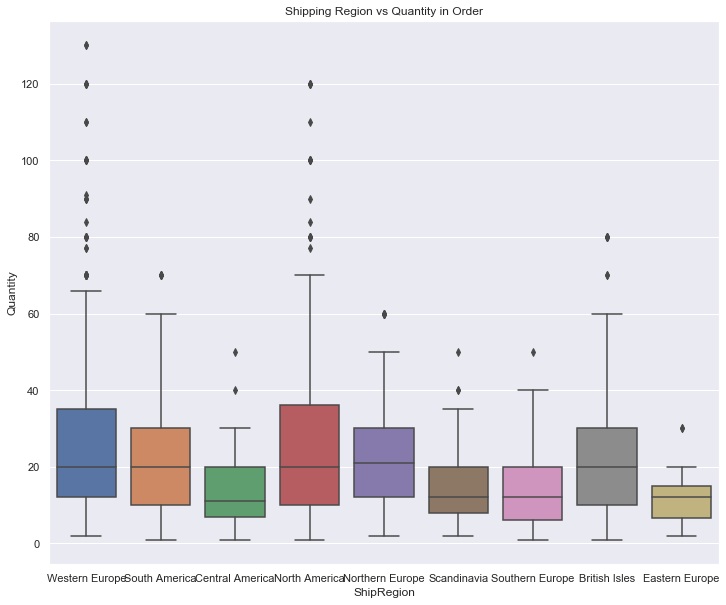

In [183]:
#Visualize the differences in quantity ordered and shipping region

sns.boxplot(x='ShipRegion', y='Quantity', data=region).set(title='Shipping Region vs Quantity in Order')

### Ho: The means of quantity of product ordered from any two regions are equal. 

### Ha: The means of quantity of product ordered from any two regions are not equal. 

In [196]:
#Using a tukey test, each region can be tested for their differences in quantity 

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.base.model import Model

tukey_test = pairwise_tukeyhsd(region['Quantity'], region['ShipRegion'] )
tukey_test._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
British Isles,Central America,-9.0586,0.0129,-17.0414,-1.0759,True
British Isles,Eastern Europe,-10.4822,0.4305,-25.4978,4.5333,False
British Isles,North America,3.2018,0.5516,-1.8286,8.2321,False
British Isles,Northern Europe,0.5165,0.9,-5.8694,6.9023,False
British Isles,Scandinavia,-8.3519,0.0358,-16.4169,-0.2869,True
British Isles,South America,-2.106,0.9,-7.291,3.079,False
British Isles,Southern Europe,-8.1633,0.0029,-14.6285,-1.6982,True
British Isles,Western Europe,3.9549,0.1787,-0.7332,8.643,False
Central America,Eastern Europe,-1.4236,0.9,-17.3662,14.519,False
Central America,North America,12.2604,0.001,4.9116,19.6091,True


## From the results of the tukey test, there are many significant differences in quantity ordered by region. However, the largest effect size is seen between Central America and Western Europe. The company can think about what strategies from Western Europe they apply to Central America to increase sales. 

# Q3. Does the office where an order was processed have an effect on the quantity of product ordered?

In [202]:
#Source data from Employee table

cur.execute("""SELECT *
               FROM Employee
               ;
               """)
employee = pd.DataFrame(cur.fetchall())
employee.columns = [i[0] for i in cur.description]
employee.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [201]:
#Join employee, order, and orderdetail tables to obtain the necessary data

cur.execute("""SELECT *
               FROM Employee
               JOIN 'Order'
               ON Employee.Id = 'Order'.EmployeeId
               JOIN OrderDetail
               ON 'Order'.Id = OrderDetail.OrderID
               ;
               """)
city = pd.DataFrame(cur.fetchall())
city.columns = [i[0] for i in cur.description]
city.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,...,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,...,Reims,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0
1,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,...,Reims,Western Europe,51100,France,10248/42,10248,42,9.8,10,0.0
2,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,...,Reims,Western Europe,51100,France,10248/72,10248,72,34.8,5,0.0
3,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,...,Münster,Western Europe,44087,Germany,10249/14,10249,14,18.6,9,0.0
4,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,...,Münster,Western Europe,44087,Germany,10249/51,10249,51,42.4,40,0.0


In [204]:
#Determine the number of cities 

city['City'].value_counts()

Seattle     605
London      568
Redmond     420
Kirkland    321
Tacoma      241
Name: City, dtype: int64

[Text(0.5, 1.0, 'Office Location vs Quantity in Order')]

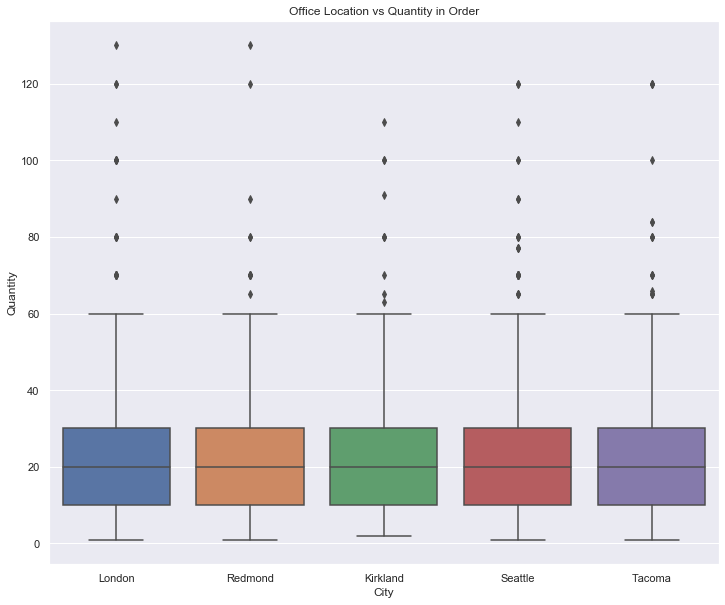

In [206]:
#Visualize the differences in quantity and cities

sns.boxplot(x='City', y='Quantity', data=city).set(title='Office Location vs Quantity in Order')

### Ho: The means of quantity of product ordered through any two offices are equal. 

### Ha: The means of quantity of product ordered through any two offices are not equal. 

In [205]:
tukey_test_city = pairwise_tukeyhsd(city['Quantity'], city['City'] )
tukey_test_city._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
Kirkland,London,-0.0121,0.9,-3.6379,3.6137,False
Kirkland,Redmond,-1.1325,0.9,-4.982,2.7171,False
Kirkland,Seattle,-1.7751,0.6383,-5.3606,1.8104,False
Kirkland,Tacoma,0.6634,0.9,-3.7623,5.0891,False
London,Redmond,-1.1204,0.8858,-4.462,2.2212,False
London,Seattle,-1.763,0.5051,-4.7967,1.2707,False
London,Tacoma,0.6755,0.9,-3.3163,4.6673,False
Redmond,Seattle,-0.6426,0.9,-3.9405,2.6553,False
Redmond,Tacoma,1.7959,0.7422,-2.4002,5.992,False
Seattle,Tacoma,2.4385,0.4462,-1.5167,6.3938,False


## From the results of the tukey test, no city's quantity of orders is significantly different from any other city. Every office is perfoming equally. Best practices can not be taken from any one office. 